In [156]:
# imports
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from scipy.stats import chisquare
import seaborn as sns
import statsmodels.api as sm
import matplotlib.ticker as mtick

pio.renderers.default = 'browser'  # Opens the plot in your default web browser

In [187]:
path = './data/raw'
df = pd.DataFrame()

for i in range(8):
    new_df = pd.read_csv(path+f'/Education_videos_{i}_cleaned.csv')
    new_df = new_df.dropna(axis=0)
    df = pd.concat([df, new_df])
    del(new_df)
    print(f'Imported Education_videos_{i}_cleaned.csv')

df['upload_date'] = pd.to_datetime(df['upload_date'])
df['year'] = df['upload_date'].dt.year
df['month'] = df['upload_date'].dt.month

classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(lambda x: ast.literal_eval(x))
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

Imported Education_videos_0_cleaned.csv
Imported Education_videos_1_cleaned.csv
Imported Education_videos_2_cleaned.csv
Imported Education_videos_3_cleaned.csv
Imported Education_videos_4_cleaned.csv
Imported Education_videos_5_cleaned.csv
Imported Education_videos_6_cleaned.csv
Imported Education_videos_7_cleaned.csv


# Checking representativeness

16.285601063032317 0.2962458949870938


C:\Users\fpili\AppData\Local\Temp\ipykernel_19696\528801815.py:18: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



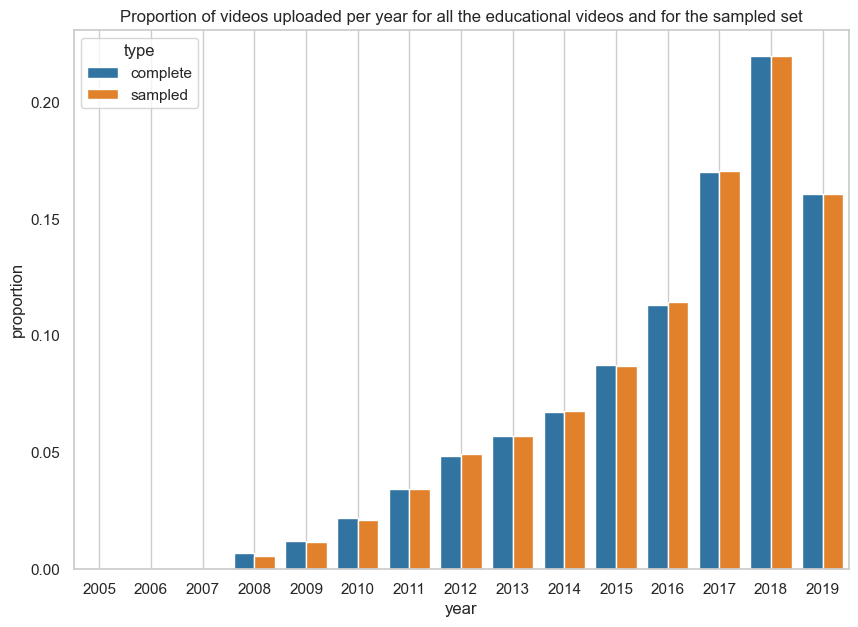

In [188]:
# Proportions
classified_proportions = (classified.groupby('year').size()/len(classified)).reset_index(name='proportion')
original_proportions = (df.groupby('year').size()/len(df)).reset_index(name='proportion')
original_proportions['type'] = 'complete'
classified_proportions['type'] = 'sampled'
proportions_df = pd.concat([original_proportions, classified_proportions])

# Chisquare goodness of fit
sampled = classified.groupby('year').size()
complete = df.groupby('year').size()
complete = complete * (sampled.sum() / complete.sum())
chi_stat, p_value = chisquare(f_obs=sampled, f_exp=complete)
print(chi_stat, p_value)

# Plot
fig, ax = plt.subplots(1,1, figsize=(10,7))
palette = sns.color_palette("tab10")
sns.barplot(data=proportions_df, x='year', y='proportion', hue='type', ax=ax, palette=palette)
ax.grid()
ax.set_title('Proportion of videos uploaded per year for all the educational videos and for the sampled set')
plt.savefig(f"./data/figures/hybs/comparison_proportion_video_uploaded_year.png")
plt.show()

# Plotly
# Merge the proportions into a single DataFrame
proportions_df = pd.DataFrame({
    'year': classified_proportions.index,
    'sample_dataset': classified_proportions['proportion'],
    'whole_dataset': original_proportions['proportion']
})

# Create the grouped bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=proportions_df['year'],
    y=proportions_df['sample_dataset'],
    name='Sample Dataset'
))
fig.add_trace(go.Bar(
    x=proportions_df['year'],
    y=proportions_df['whole_dataset'],
    name='Whole Dataset'
))

# Update layout for better visualization
fig.update_layout(
    title='Proportion of videos uploaded per year for all the educational videos and for the sampled set',
    xaxis_title='Year',
    yaxis_title='Proportion',
    barmode='group',  # Side-by-side bars
    legend_title='Dataset',
        xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    title_x = 0.5,
)
fig.write_html(f"./data/figures/hybs/comparison_proportion_video_uploaded_year.html")
# fig.show()

> Cannot reject null hypothesis that the two distribution have the same frequencies

14.488299611094055 0.20714103096036054


C:\Users\fpili\AppData\Local\Temp\ipykernel_19696\226191677.py:18: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



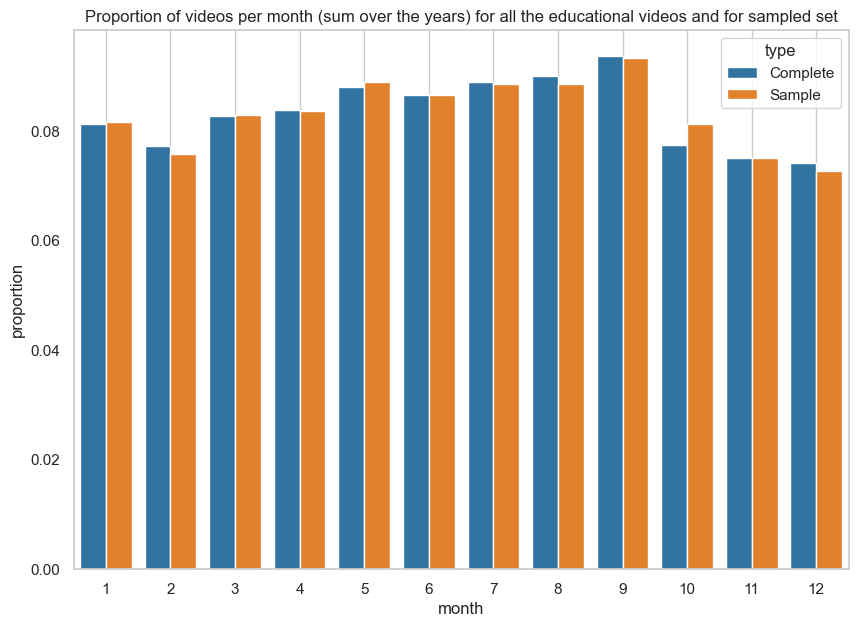

In [189]:
# Proportions
classified_proportion = (classified.groupby('month').size()/len(classified)).reset_index(name='proportion')
original_proportion = (df.groupby('month').size()/len(df)).reset_index(name='proportion')
classified_proportion['type'] = 'Sample'
original_proportion['type'] = 'Complete'
proportions_df = pd.concat([original_proportion, classified_proportion])

# Chisquare goodness of fit
sampled = classified.groupby('month').size()
complete = df.groupby('month').size()
complete = complete * (sampled.sum() / complete.sum())
chi_stat, p_value = chisquare(f_obs=sampled, f_exp=complete)
print(chi_stat, p_value)

# Plot
fig, ax = plt.subplots(1,1, figsize=(10,7))
palette = sns.color_palette("tab10")
sns.barplot(data=proportions_df, x='month', y='proportion', hue='type', ax=ax, palette=palette)
ax.set_title('Proportion of videos per month (sum over the years) for all the educational videos and for sampled set')
ax.grid()
plt.savefig(f"./data/figures/hybs/comparison_proportion_video_uploaded_month.png")

# Plotly
# Merge the proportions into a single DataFrame
proportions_df = pd.DataFrame({
    'month': classified_proportion.index + 1,
    'sample_dataset': classified_proportion['proportion'],
    'whole_dataset': original_proportion['proportion']
})

# Create the grouped bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=proportions_df['month'],
    y=proportions_df['sample_dataset'],
    name='Sample Dataset'
))
fig.add_trace(go.Bar(
    x=proportions_df['month'],
    y=proportions_df['whole_dataset'],
    name='Whole Dataset'
))

# Update layout for better visualization
fig.update_layout(
    title='Proportion of videos per month (sum over the years) for all the educational videos and for sampled set',
    xaxis_title='Month',
    yaxis_title='Proportion',
    barmode='group',  # Side-by-side bars
    legend_title='Dataset',
        xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    title_x = 0.5,
)
fig.write_html(f"./data/figures/hybs/comparison_proportion_video_uploaded_month.html")
# fig.show()

> Cannot reject null hypothesis that the two distribution have the same frequencies

# Distribution across labels (not used)

Text(0.5, 1.0, 'Number of videos for each label')

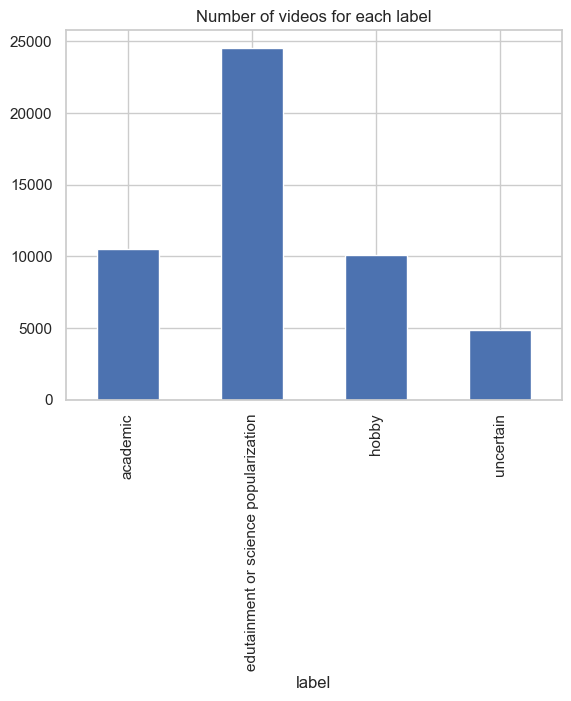

In [190]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])

fig, ax = plt.subplots(1,1)
classified.groupby('label').size().plot(kind='bar', ax=ax)
ax.set_title('Number of videos for each label')

Text(0.5, 1.0, 'average views')

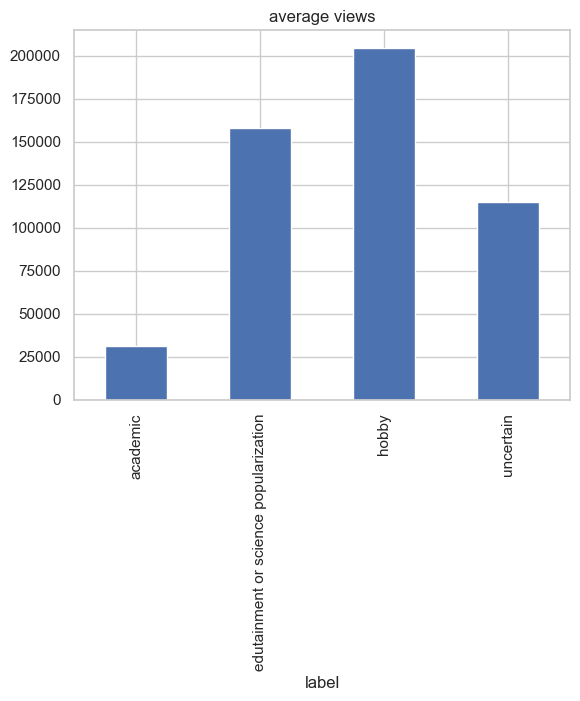

In [191]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])

fig, ax = plt.subplots(1,1)
classified.groupby('label')['view_count'].mean().plot(kind='bar', ax=ax)
ax.set_title('average views')

Text(0.5, 1.0, 'average likes')

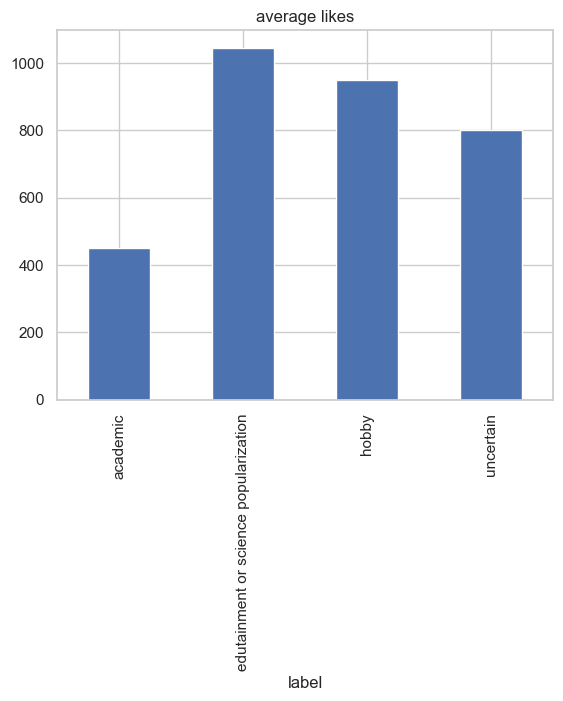

In [192]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])

fig, ax = plt.subplots(1,1)
classified.groupby('label')['like_count'].mean().plot(kind='bar', ax=ax)
ax.set_title('average likes')

Text(0.5, 1.0, 'average dislikes')

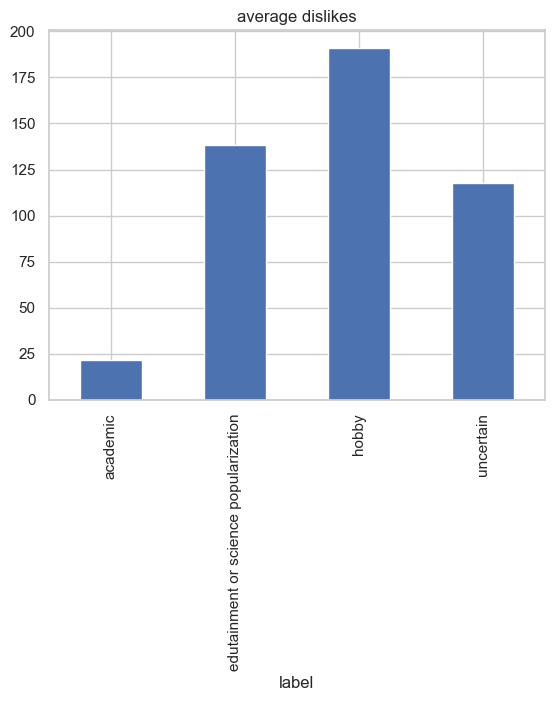

In [193]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])

fig, ax = plt.subplots(1,1)
classified.groupby('label')['dislike_count'].mean().plot(kind='bar', ax=ax)
ax.set_title('average dislikes')

Text(0.5, 1.0, 'average duration')

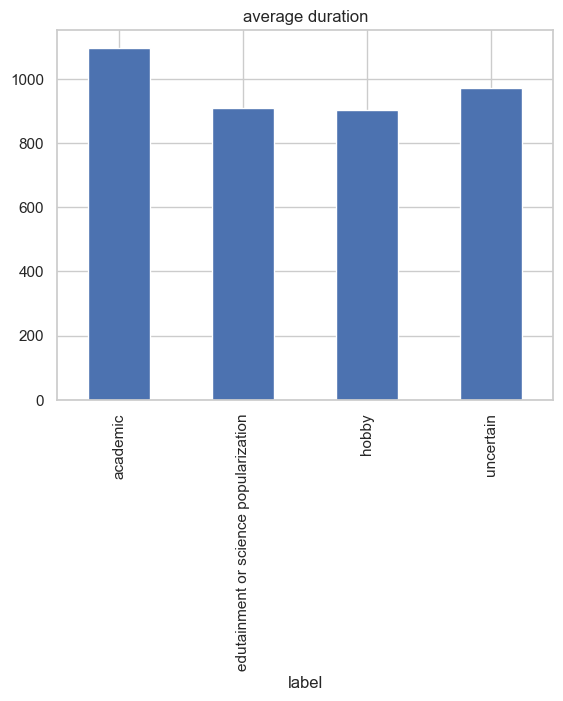

In [194]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])

fig, ax = plt.subplots(1,1)
classified.groupby('label')['duration'].mean().plot(kind='bar', ax=ax)
ax.set_title('average duration')

> Significantly more Edutainement videos than for the other labels. Align with the hypothesis that edutainement became very popular on youtube and that it is the main source of educational content

# Categories across years


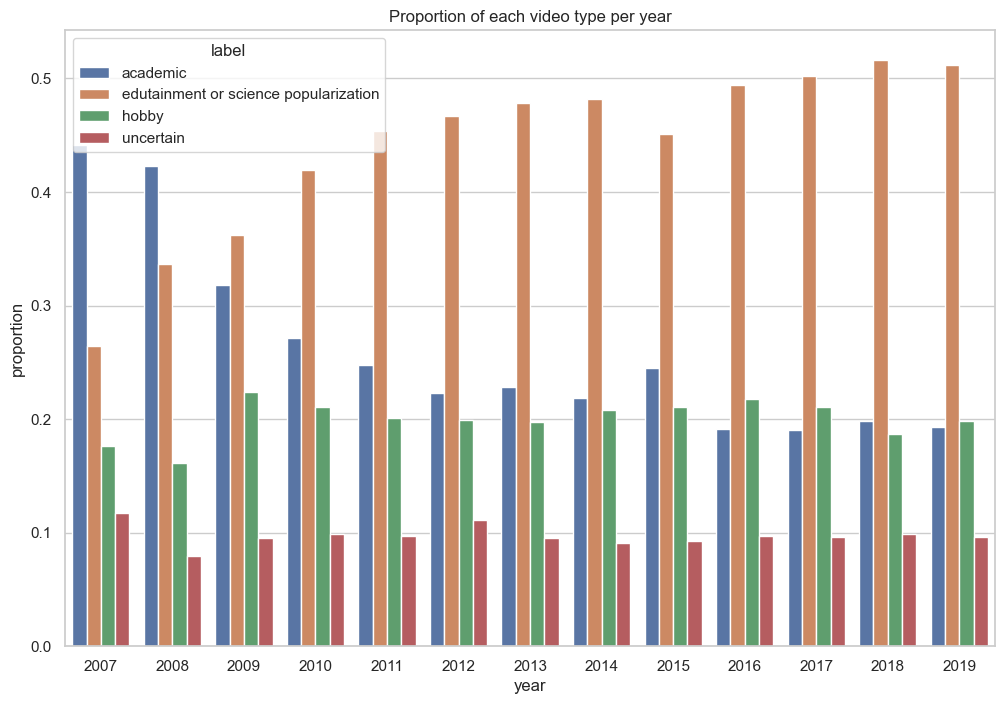

In [195]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
# Remove 2005, 2006, as the number of videos is too low to make any statistical analysis
years = np.arange(2007, 2020)
classified = classified[classified['year'].isin(years)]

# Compute proportion per year for each label
count_per_year_label = classified.groupby(['year', 'label']).size().unstack(fill_value=0)
proportion_per_year = count_per_year_label.div(count_per_year_label.sum(axis=1), axis=0)

# Convert for easier plot
proportion_long = proportion_per_year.reset_index().melt(id_vars='year', value_name='proportion', var_name='label')

# Plot
sns.set_theme(style="whitegrid")
palette = sns.color_palette("deep", 4)  # 4 distinct colors from the Set2 palette
fig, ax = plt.subplots(1,1, figsize=(12,8))

sns.barplot(data=proportion_long, x='year', y='proportion', hue='label', ax=ax, palette=palette)
ax.set_title('Proportion of each video type per year')
plt.savefig("./data/figures/hybs/proportion_video_type_per_year.png")
plt.show()


# Plotly
fig_plotly = px.bar(
    proportion_long,
    x='year',
    y='proportion',
    color='label',
    title='Proportion of Each Video Type per Year',
    labels={'proportion': 'Proportion', 'year': 'Year', 'label': 'Video Type'},
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig_plotly.update_layout(
    barmode='group',  # Side-by-side bars
    xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    yaxis_title='Proportion',
    legend_title='Video Type',
    title_x=0.5
)
# Show Plotly plot
# fig_plotly.show()
fig_plotly.write_html(f"./data/figures/hybs/proportion_video_type_per_year.html")

> We can observe a decline of the academic videos for the benefit of edutainment videos.

> There is a noticable increase of edutainment videos from 2008 to 2013, suggesting that edutainment became popular in the early years of youtube.
> The early rise in popularity could reflect the novelty of the platform and the unmet demand for accessible educational content.
> The slower growth in later years might suggest a maturation of the YouTube ecosystem, where edutainment became an established genre.

> We see that academic videos became less and less popular reaching a plateau at around 2011, reaching a plateau. We could argue that youtube introduced a new type of educational content that is easier to consume and fits YouTube’s informal and entertainment-focused culture better.

> The transition from academic to edutainment content reflects changing consumer preferences. Viewers on YouTube may prefer content that simplifies complex topics, incorporates storytelling, and uses visuals and humor to maintain engagement.

### OLS

In [196]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
# Remove 2005, 2006 as the number of videos is too low to make any statistical analysis
years = np.arange(2007, 2020)
classified = classified[classified['year'].isin(years)]

# Compute proportion per year for each label
count_per_year_label = classified.groupby(['year', 'label']).size().unstack(fill_value=0)
proportion_per_year = count_per_year_label.div(count_per_year_label.sum(axis=1), axis=0).reset_index()

X = proportion_per_year['year']
X = sm.add_constant(X)

# Academic
Y = proportion_per_year['academic']
model_academic = sm.OLS(Y, X).fit()
print('Academic')
print(model_academic.summary())

# Edutainment
Y = proportion_per_year['edutainment or science popularization']
model_edutainment = sm.OLS(Y, X).fit()
print('Edutainment')
print(model_edutainment.summary())

# Hobby
Y = proportion_per_year['hobby']
model_hobby = sm.OLS(Y, X).fit()
print('Hobby')
print(model_hobby.summary())

Academic
                            OLS Regression Results                            
Dep. Variable:               academic   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     30.20
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           0.000188
Time:                        14:14:07   Log-Likelihood:                 22.828
No. Observations:                  13   AIC:                            -41.66
Df Residuals:                      11   BIC:                            -40.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5186      6.780      5.534

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.



> Academic : R² = 0.733, pvalue = 0.0.000188, statistic relationship between year and proportion of academic videos

> Edutainment : R² = 0.792, pvalue = 4.63e-05, statistic relationship between year and proportion of edutainment videos

> hobby : R² = 0.100, pvalue = 0.292, no statistical relationship between year and proportion of hobby videos

# Academic videos

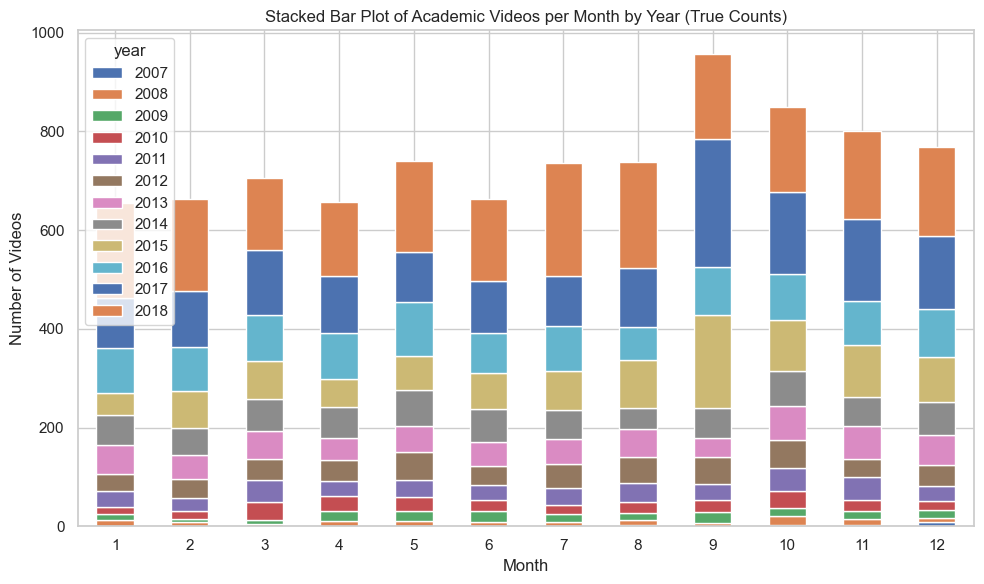

In [198]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2019 as the number of videos is too low to make any statistical analysis (year 2019 is not finished on the dataset)
years = np.arange(2007, 2019)
classified = classified[classified['year'].isin(years)]
academic = classified[classified['label'] == 'academic']

# Compute monthly count per year
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
monthly_counts.T.plot(
    kind='bar', 
    stacked=True, 
    ax=ax
)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Videos')
ax.set_title('Stacked Bar Plot of Academic Videos per Month by Year (True Counts)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("./data/figures/hybs/academic_videos_per_month_by_year.png")
plt.show()

# Plotly
# Reset the index and ensure 'month' is included
monthly_counts_reset = monthly_counts.T.reset_index().rename(columns={'index': 'month'})
# Convert the DataFrame to a long format for Plotly
monthly_counts_long = monthly_counts_reset.melt(id_vars='month', var_name='year', value_name='count')

# Plot with Plotly
fig_plotly = px.bar(
    monthly_counts_long,
    x='month',
    y='count',
    color='year',
    title='Stacked Bar Plot of Academic Videos per Month by Year (True Counts)',
    labels={'month': 'Month', 'count': 'Number of Videos', 'year': 'Year'},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Dark2,
)

fig_plotly.update_layout(
    xaxis=dict(
        tickmode='linear',
        dtick=1,
        title='Month'
    ),
    yaxis_title='Number of Videos',
    legend_title='Year',
    title_x=0.5
)

fig_plotly.write_html(f"./data/figures/hybs/academic_videos_per_month_by_year.html")
# fig_plotly.show()

### chi² with total sample distrib

In [199]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2019 as the number of videos is too low to make any statistical analysis (2019 is not finished in the dataset)
years = np.arange(2007, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'academic']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby('month').size()

# distribution for the whols sample
total = classified.groupby('month').size()
total_scaled = total * (monthly_counts.sum() / total.sum())


chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
print(chi_stat, p_value)


51.04200520476077 4.0627904907882806e-07


> Very strong statistical evidence that the number of academic videos does not follow the distribution of total videos per month (sampled)

### Which year is responsible for the divergence

Year: 2008, Chi-square Statistic: 10.81, p-value: 0.4591
Year: 2009, Chi-square Statistic: 14.36, p-value: 0.2138
Year: 2010, Chi-square Statistic: 22.63, p-value: 0.0199
Year: 2011, Chi-square Statistic: 9.20, p-value: 0.6036
Year: 2012, Chi-square Statistic: 9.35, p-value: 0.5896
Year: 2013, Chi-square Statistic: 13.33, p-value: 0.2723
Year: 2014, Chi-square Statistic: 13.16, p-value: 0.2830
Year: 2015, Chi-square Statistic: 129.13, p-value: 0.0000
Year: 2016, Chi-square Statistic: 16.23, p-value: 0.1330
Year: 2017, Chi-square Statistic: 130.80, p-value: 0.0000
Year: 2018, Chi-square Statistic: 45.68, p-value: 0.0000


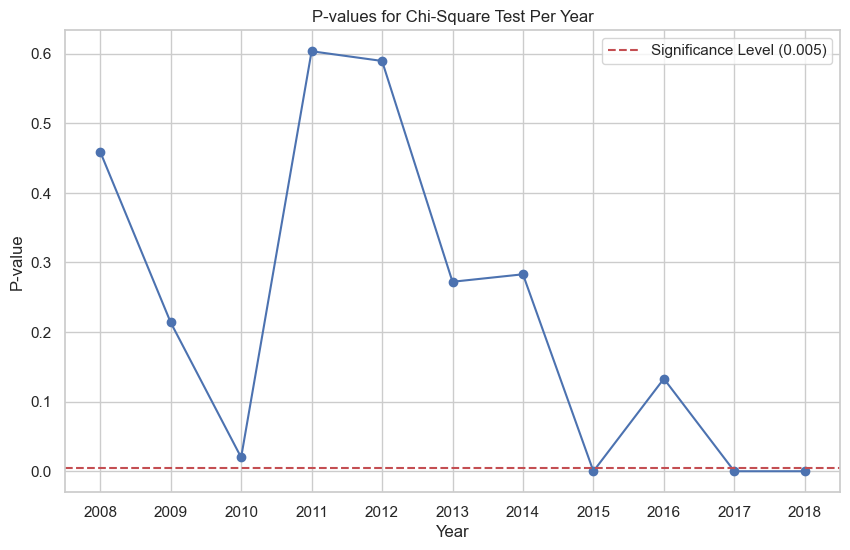

In [200]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007, 2019 as the number of videos is too low (2007 do not contains value for every month so not possible to compute chisquare)
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'academic']

# Overall distribution for the total sample (across all years)
total = classified.groupby('month').size()

# Initialize storage for p-values
p_values = []

# Perform chi-square test for each year
for year in years:
    # Get monthly counts for academic videos for the current year
    monthly_counts = academic[academic['year'] == year].groupby('month').size()
    
    # Get total scaled distribution for the current year
    total_scaled = total * (monthly_counts.sum() / total.sum())
    
    # Perform chi-square test
    chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
    p_values.append(p_value)
    print(f"Year: {year}, Chi-square Statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")

# Plot p-values to visualize the contribution of each year
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o')
plt.axhline(0.005, color='r', linestyle='--', label='Significance Level (0.005)')
plt.title('P-values for Chi-Square Test Per Year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.xticks(years)
plt.legend()
plt.grid('on')
plt.savefig(f"./data/figures/hybs/academic_chisquare_p_value_per_year.png")
plt.show()

# Plotly
fig_plotly = go.Figure()
# Add P-values as a line
fig_plotly.add_trace(go.Scatter(
    x=years,
    y=p_values,
    mode='lines+markers',
    name='P-values'
))
# Add the significance level line
fig_plotly.add_trace(go.Scatter(
    x=years,
    y=[0.005] * len(years),
    mode='lines',
    name='Significance Level (0.005)',
    line=dict(color='red', dash='dash')
))
# Update layout
fig_plotly.update_layout(
    title='P-values for Chi-Square Test Per Year',
    xaxis_title='Year',
    yaxis_title='P-value',
    xaxis=dict(
        tickmode='linear', 
        dtick=1, 
        showgrid=True, 
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='P-value', 
        showgrid=True, 
        gridcolor='lightgrey'
    ),
    legend_title='Legend',
    title_x=0.5,
    template='plotly_white'
)

fig_plotly.write_html(f"./data/figures/hybs/academic_chisquare_p_value_per_year.html")
# fig_plotly.show()

> looking at the p values for each year, the years that contribute to the statistical difference in distribution are the years 2010, 2015, 2017, 2018

### Plot these years

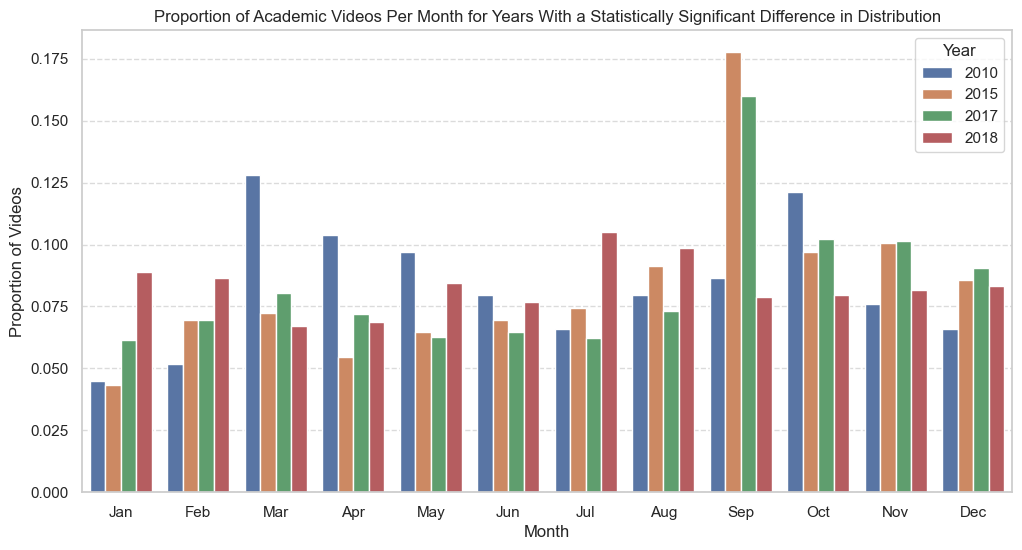

In [201]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 and filter for specific years
years = [2010, 2015, 2017, 2018]
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'academic']

# Group by year and month to compute the counts
monthly_counts = academic.groupby(['year', 'month']).size().reset_index(name='count')

# Compute proportions within each year
monthly_counts['proportion'] = monthly_counts.groupby('year')['count'].transform(lambda x: x / x.sum())

# Plot the proportions using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='month', y='proportion', hue='year', palette='deep')

# Customize the plot
plt.title('Proportion of Academic Videos Per Month for Years With a Statistically Significant Difference in Distribution')
plt.xlabel('Month')
plt.ylabel('Proportion of Videos')
plt.legend(title='Year')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f"./data/figures/hybs/academic_years_causing_divergence.png")
plt.show()

# Plotly
# Create the figure
custom_palette = px.colors.qualitative.Dark2
fig = go.Figure()
# Add a trace for each year
for idx, year in enumerate(monthly_counts['year'].unique()):
    year_data = monthly_counts[monthly_counts['year'] == year]
    fig.add_trace(go.Bar(
        x=year_data['month'],
        y=year_data['proportion'],
        name=str(year),
        marker=dict(color=custom_palette[idx % len(custom_palette)])
    ))
# Update layout
fig.update_layout(
    title='Proportion of Academic Videos Per Month (Side-by-Side)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        dtick=1,
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ),
    yaxis=dict(
        title='Proportion of Videos'
    ),
    barmode='group',  # Ensure side-by-side bars
    template='plotly_white',
    legend_title_text='Year',
)
# Show the plot
fig_plotly.write_html(f"./data/figures/hybs/academic_years_causing_divergence.html")
# fig.show()

> for 2015, 2017, peak in september. for 2010, peak in march, for 2018 more even distribution

# Edutainement videos

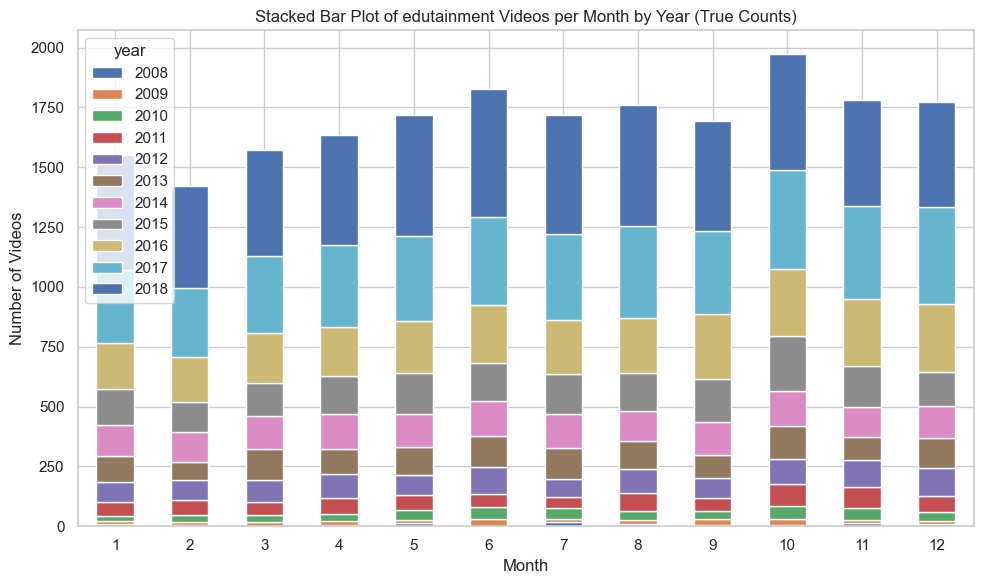

In [202]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'edutainment or science popularization']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

monthly_counts.T.plot(
    kind='bar', 
    stacked=True, 
    ax=ax
)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Videos')
ax.set_title('Stacked Bar Plot of edutainment Videos per Month by Year (True Counts)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [203]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'edutainment or science popularization']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby('month').size()

# distribution for the whols sample
total = classified.groupby('month').size()
total_scaled = total * (monthly_counts.sum() / total.sum())


chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
print(chi_stat, p_value)


18.13754997540116 0.07844335614097438


Year: 2008, Chi-square Statistic: 27.01, p-value: 0.0046
Year: 2009, Chi-square Statistic: 12.76, p-value: 0.3090
Year: 2010, Chi-square Statistic: 15.42, p-value: 0.1640
Year: 2011, Chi-square Statistic: 23.88, p-value: 0.0133
Year: 2012, Chi-square Statistic: 17.77, p-value: 0.0870
Year: 2013, Chi-square Statistic: 21.45, p-value: 0.0290
Year: 2014, Chi-square Statistic: 11.26, p-value: 0.4220
Year: 2015, Chi-square Statistic: 17.12, p-value: 0.1043
Year: 2016, Chi-square Statistic: 18.87, p-value: 0.0634
Year: 2017, Chi-square Statistic: 9.94, p-value: 0.5361
Year: 2018, Chi-square Statistic: 42.31, p-value: 0.0000


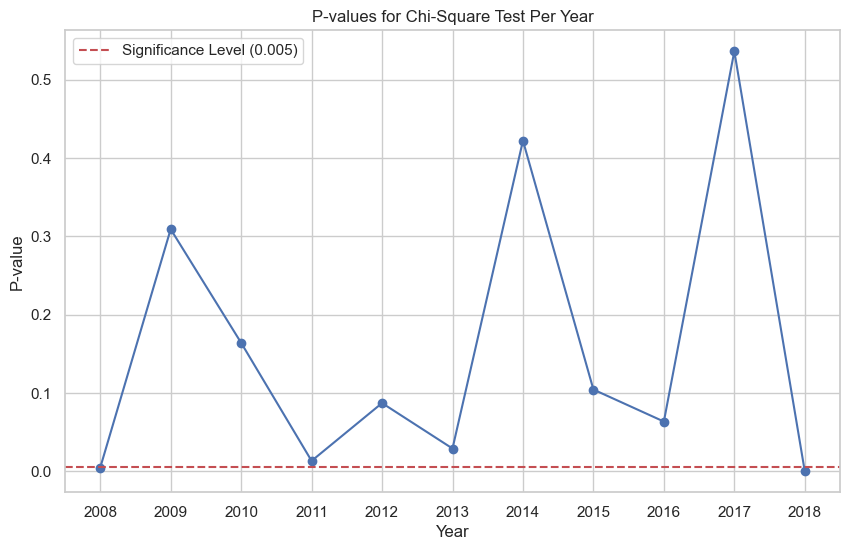

In [204]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 as the number of videos is too low
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'edutainment or science popularization']

# Overall distribution for the total sample (across all years)
total = classified.groupby('month').size()

# Initialize storage for p-values
p_values = []

# Perform chi-square test for each year
for year in years:
    # Get monthly counts for academic videos for the current year
    monthly_counts = academic[academic['year'] == year].groupby('month').size()
    
    # Get total scaled distribution for the current year
    total_scaled = total * (monthly_counts.sum() / total.sum())
    
    # Perform chi-square test
    chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
    p_values.append(p_value)
    print(f"Year: {year}, Chi-square Statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")

# Plot p-values to visualize the contribution of each year
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o')
plt.axhline(0.005, color='r', linestyle='--', label='Significance Level (0.005)')
plt.title('P-values for Chi-Square Test Per Year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.xticks(years)
plt.legend()
plt.grid('on')
plt.show()


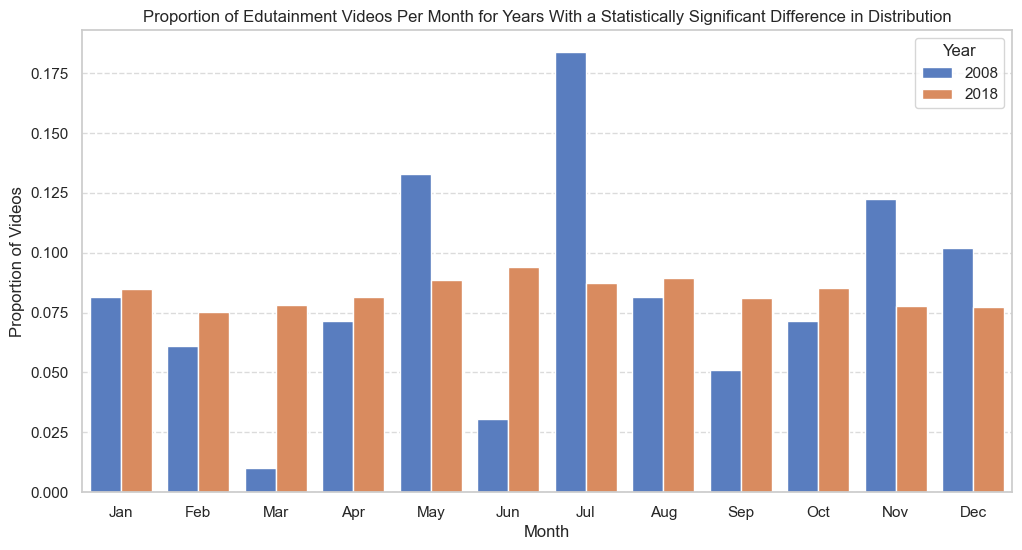

In [205]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 and filter for specific years
years = [2008, 2018]
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'edutainment or science popularization']

# Group by year and month to compute the counts
monthly_counts = academic.groupby(['year', 'month']).size().reset_index(name='count')

# Compute proportions within each year
monthly_counts['proportion'] = monthly_counts.groupby('year')['count'].transform(lambda x: x / x.sum())

# Plot the proportions using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='month', y='proportion', hue='year', palette='muted')

# Customize the plot
plt.title('Proportion of Edutainment Videos Per Month for Years With a Statistically Significant Difference in Distribution')
plt.xlabel('Month')
plt.ylabel('Proportion of Videos')
plt.legend(title='Year')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Hobby videos

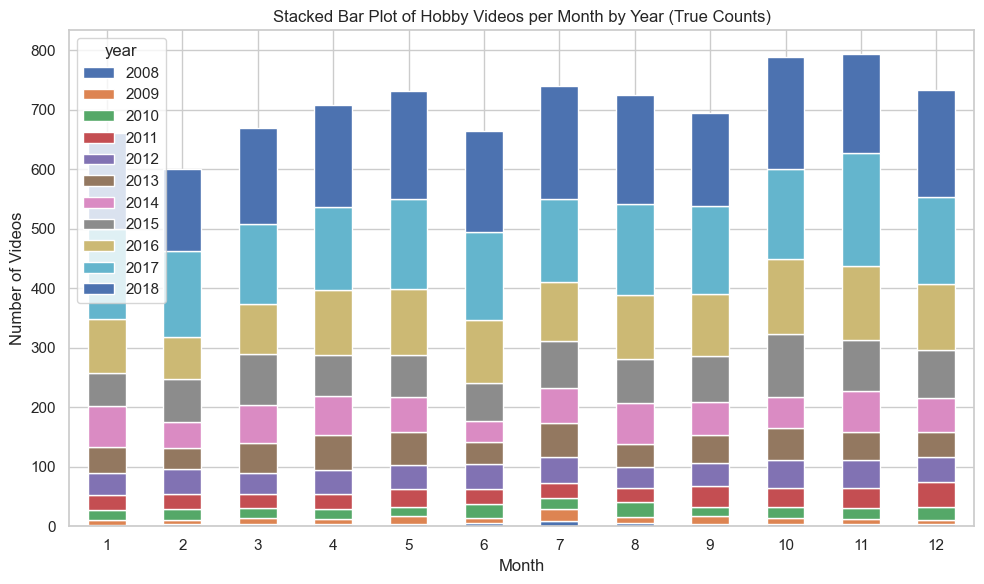

In [206]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'hobby']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

monthly_counts.T.plot(
    kind='bar', 
    stacked=True, 
    ax=ax
)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Videos')
ax.set_title('Stacked Bar Plot of Hobby Videos per Month by Year (True Counts)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [207]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'hobby']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby('month').size()

# distribution for the whols sample
total = classified.groupby('month').size()
total_scaled = total * (monthly_counts.sum() / total.sum())


chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
print(chi_stat, p_value)


13.011357739410267 0.29258372101700975


Year: 2008, Chi-square Statistic: 6.25, p-value: 0.8564
Year: 2009, Chi-square Statistic: 13.01, p-value: 0.2929
Year: 2010, Chi-square Statistic: 5.16, p-value: 0.9231
Year: 2011, Chi-square Statistic: 7.48, p-value: 0.7587
Year: 2012, Chi-square Statistic: 4.19, p-value: 0.9639
Year: 2013, Chi-square Statistic: 15.18, p-value: 0.1744
Year: 2014, Chi-square Statistic: 22.45, p-value: 0.0211
Year: 2015, Chi-square Statistic: 13.72, p-value: 0.2489
Year: 2016, Chi-square Statistic: 9.70, p-value: 0.5579
Year: 2017, Chi-square Statistic: 14.23, p-value: 0.2204
Year: 2018, Chi-square Statistic: 8.46, p-value: 0.6717


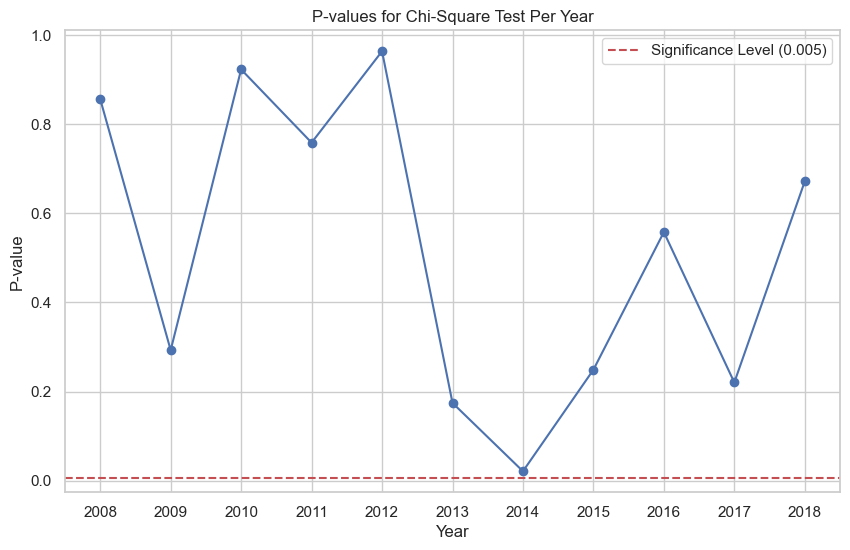

In [208]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 as the number of videos is too low
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'hobby']

# Overall distribution for the total sample (across all years)
total = classified.groupby('month').size()

# Initialize storage for p-values
p_values = []

# Perform chi-square test for each year
for year in years:
    # Get monthly counts for academic videos for the current year
    monthly_counts = academic[academic['year'] == year].groupby('month').size()
    
    # Get total scaled distribution for the current year
    total_scaled = total * (monthly_counts.sum() / total.sum())
    
    # Perform chi-square test
    chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
    p_values.append(p_value)
    print(f"Year: {year}, Chi-square Statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")

# Plot p-values to visualize the contribution of each year
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o')
plt.axhline(0.005, color='r', linestyle='--', label='Significance Level (0.005)')
plt.title('P-values for Chi-Square Test Per Year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.xticks(years)
plt.legend()
plt.grid('on')
plt.show()


# Education content over time

In [154]:
import pandas as pd
df_vd = pd.read_feather("./data/raw/yt_metadata_helper.feather")

In [155]:
df_vd['upload_date'] = pd.to_datetime(df_vd['upload_date'])
df_vd['year'] = df_vd['upload_date'].dt.year

## Education videos over time

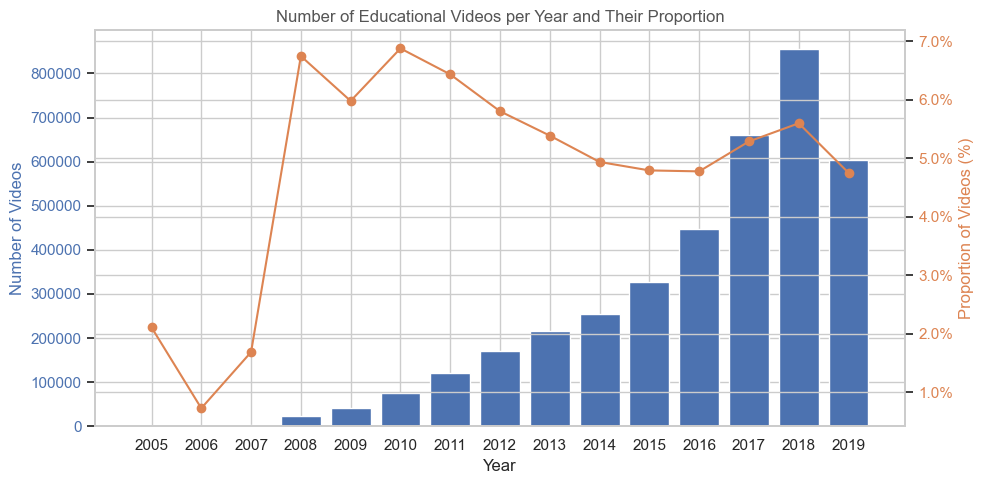

In [210]:
colors = sns.color_palette("deep")
bar_color = colors[0]    # for bars
line_color = colors[1]   # for line

number_per_year = df_vd[df_vd['categories'] == 'Education'].groupby('year').size()
total_videos_per_year = df_vd.groupby('year').size()
proportion_per_year = number_per_year.div(total_videos_per_year) * 100  # Convert to percentages

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
ax.bar(number_per_year.index, number_per_year.values, color=bar_color, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Videos', color=bar_color)
ax.set_xticks(number_per_year.index)
ax.tick_params(axis='y', labelcolor=bar_color)

# Create a twin axis for the percentages
ax2 = ax.twinx()
ax2.plot(proportion_per_year.index, proportion_per_year.values, 
         color=line_color, marker='o', markerfacecolor=line_color, markeredgecolor=line_color)
ax2.set_ylabel('Proportion of Videos (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Format the second y-axis to show the '%' sign
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Number of Educational Videos per Year and Their Proportion', color='#555555')
plt.tight_layout()
plt.savefig('./data/figures/hybs/educational_videos_number_proportion_per_year.png')
plt.show()

# Create the Plotly figure
fig = go.Figure()
# Add the bar chart for the number of videos
fig.add_trace(go.Bar(
    x=number_per_year.index,
    y=number_per_year.values,
    name='Number of Videos',
    marker_color='rgb(31, 119, 180)',  # Deep blue color
    yaxis='y'  # Link to primary y-axis
))
# Add the line chart for the proportions
fig.add_trace(go.Scatter(
    x=proportion_per_year.index,
    y=proportion_per_year.values,
    name='Proportion of Videos',
    mode='lines+markers',
    line=dict(color='rgb(255, 127, 14)', width=2),  # Deep orange line
    marker=dict(size=8, color='rgb(255, 127, 14)'),
    yaxis='y2'  # Link to secondary y-axis
))
# Customize the layout
fig.update_layout(
    title='Number of Educational Videos per Year and Their Proportion',
    title_x=0.5,
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title=dict(
            text='Number of Videos',
            font=dict(color='rgb(31, 119, 180)')
        ),
        tickfont=dict(color='rgb(31, 119, 180)')
    ),
    yaxis2=dict(
        title=dict(
            text='Proportion of Videos (%)',  # Add percentage symbol in the title
            font=dict(color='rgb(255, 127, 14)')
        ),
        tickfont=dict(color='rgb(255, 127, 14)'),
        overlaying='y',  # Overlay second y-axis
        side='right',  # Place second axis on the right side
        tickformat='.2f',  # Keep the fraction as-is, e.g., 0.25 instead of 25%
    ),
    legend=dict(
        title='Metric',
        x=0.5,
        xanchor='center',
        orientation='h'
    ),
    template='plotly_white'
)
# Show the plot
fig.write_html('./data/figures/hybs/educational_videos_number_proportion_per_year.html')
# fig.show()

### OLS (starting from 2008)

In [211]:
# Only look after 2008 as it is the point from which the proportion decreases
years_to_use = np.arange(2008, 2020)
df_vd_filtered = df_vd[df_vd['year'].isin(years_to_use)]

number_per_year = df_vd_filtered[df_vd_filtered['categories'] == 'Education'].groupby('year').size()
total_videos_per_year = df_vd_filtered.groupby('year').size()
proportion_per_year = number_per_year.div(total_videos_per_year) * 100  # Convert to percentages

X = years_to_use
X = sm.add_constant(X)
Y = proportion_per_year

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     17.10
Date:                Fri, 20 Dec 2024   Prob (F-statistic):            0.00203
Time:                        14:19:01   Log-Likelihood:                -7.3302
No. Observations:                  12   AIC:                             18.66
Df Residuals:                      10   BIC:                             19.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.5489     82.210      4.203      0.0

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.



> R² = 0.631, pvalue = 0.00203, 63.1 % of variation explained by the model, relatively good fit, statistically significant model, the year has a significant effect on the proportion of academic videos. Slope = -0.1688 meaning that according to this linear model, each years shows 0.1688 % less academic videos than the preceding year

## Education channels over time

In [213]:
df_ch = pd.read_csv("./data/raw/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch = df_ch.dropna()
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])
df_ch['year'] = df_ch['join_date'].dt.year.astype(int)

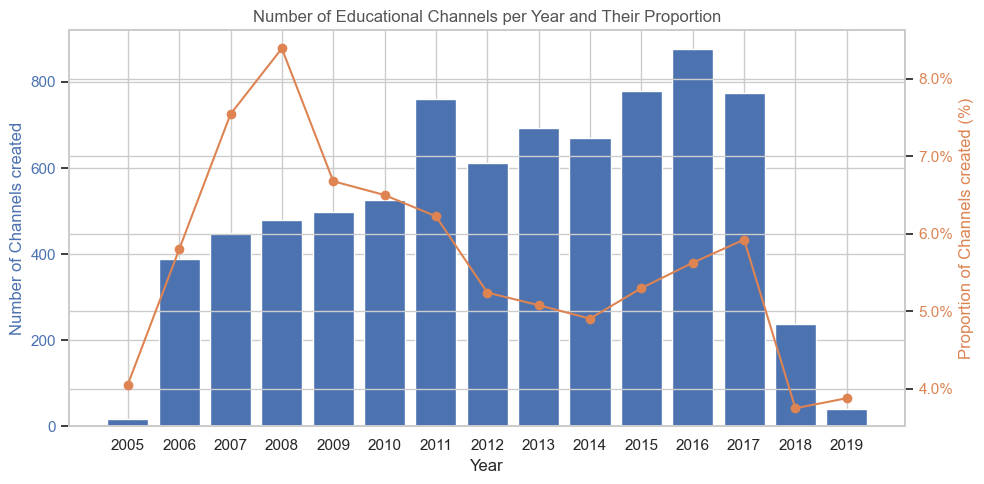

In [214]:
number_education_per_year = df_ch[df_ch['category_cc'] == 'Education'].groupby('year').size()
total_channel_per_year = df_ch.groupby('year').size()
proportion_per_year = number_education_per_year.div(total_channel_per_year) * 100

colors = sns.color_palette("deep")
bar_color = colors[0]    # for bars
line_color = colors[1]   # for line

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
ax.bar(number_education_per_year.index, number_education_per_year.values, color=bar_color, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Channels created', color=bar_color)
ax.set_xticks(number_education_per_year.index)
ax.tick_params(axis='y', labelcolor=bar_color)

# Create a twin axis for the percentages
ax2 = ax.twinx()
ax2.plot(proportion_per_year.index, proportion_per_year.values, 
         color=line_color, marker='o', markerfacecolor=line_color, markeredgecolor=line_color)
ax2.set_ylabel('Proportion of Channels created (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Format the second y-axis to show the '%' sign
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Number of Educational Channels per Year and Their Proportion', color='#555555')
plt.tight_layout()
plt.savefig("./data/figures/hybs/educational_channel_number_proportion_per_year.png")
plt.show()

# Create the Plotly figure
fig = go.Figure()
# Add the bar chart for the number of videos
fig.add_trace(go.Bar(
    x=number_education_per_year.index,
    y=number_education_per_year.values,
    name='Number of Videos',
    marker_color='rgb(31, 119, 180)',  # Deep blue color
    yaxis='y'  # Link to primary y-axis
))
# Add the line chart for the proportions
fig.add_trace(go.Scatter(
    x=proportion_per_year.index,
    y=proportion_per_year.values,
    name='Proportion of Videos',
    mode='lines+markers',
    line=dict(color='rgb(255, 127, 14)', width=2),  # Deep orange line
    marker=dict(size=8, color='rgb(255, 127, 14)'),
    yaxis='y2'  # Link to secondary y-axis
))
# Customize the layout
fig.update_layout(
    title='Number of Educational Videos per Year and Their Proportion',
    title_x=0.5,
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title=dict(
            text='Number of Videos',
            font=dict(color='rgb(31, 119, 180)')
        ),
        tickfont=dict(color='rgb(31, 119, 180)')
    ),
    yaxis2=dict(
        title=dict(
            text='Proportion of Videos (%)',  # Add percentage symbol in the title
            font=dict(color='rgb(255, 127, 14)')
        ),
        tickfont=dict(color='rgb(255, 127, 14)'),
        overlaying='y',  # Overlay second y-axis
        side='right',  # Place second axis on the right side
        tickformat='.2f',  # Keep the fraction as-is, e.g., 0.25 instead of 25%
    ),
    legend=dict(
        title='Metric',
        x=0.5,
        xanchor='center',
        orientation='h'
    ),
    template='plotly_white'
)
# Show the plot
fig.write_html("./data/figures/hybs/educational_channel_number_proportion_per_year.html")
# fig.show()

### OLS on proportion of channels created per year and number of channels created per year

In [215]:
# Remove 2005, 2006, 2007, and 2019 only for the absolute number, not for proportion
df_ch = pd.read_csv("./data/raw/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch = df_ch.dropna()
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])
df_ch['year'] = df_ch['join_date'].dt.year.astype(int)

years_to_use_proportion = np.arange(2008, 2020)
years_to_use_count = np.arange(2008, 2019)

number_education_per_year = df_ch[df_ch['category_cc'] == 'Education'].groupby('year').size()
total_channel_per_year = df_ch.groupby('year').size()
proportion_per_year = number_education_per_year.div(total_channel_per_year) * 100

number_education_per_year = number_education_per_year.reset_index(name='count')
proportion_per_year = proportion_per_year.reset_index(name='proportion')

proportion_per_year = proportion_per_year[proportion_per_year['year'].isin(years_to_use_proportion)]
number_education_per_year = number_education_per_year[number_education_per_year['year'].isin(years_to_use_count)]

# OSL count
X = number_education_per_year['year']
X = sm.add_constant(X)
Y = number_education_per_year['count']
model_count = sm.OLS(Y, X).fit()
print('Number education channels created per year')
print(model_count.summary())

# OSL proportion
X = proportion_per_year['year']
X = sm.add_constant(X)
Y = proportion_per_year['proportion']
model_count = sm.OLS(Y, X).fit()
print('\nProportion education channels created per year')
print(model_count.summary())

Number education channels created per year
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.2775
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.611
Time:                        14:20:06   Log-Likelihood:                -72.161
No. Observations:                  11   AIC:                             148.3
Df Residuals:                       9   BIC:                             149.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.



> Number of channels created per year : R² = 0.03, the model is not statistically significant, but this is due to the year 2018 that has a very low amount of educational channels created.

> Proportion of educational channels created per year : R² = 0.684, pvalue = 0.000903. The model is statistically significant, with a slope of -0.29 meaning that each year has 0.29% less educational channels created than the previous year

# Time series

In [171]:
df_ch = pd.read_csv("./data/raw/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch = df_ch.dropna()
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])
df_ch['year'] = df_ch['join_date'].dt.year.astype(int)


df_ts = pd.read_csv("./data/raw/df_timeseries_en.tsv.gz", compression="infer", sep="\t")
df_ts = df_ts.dropna()
df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
df_ts['year'] = df_ts['datetime'].dt.year
df_ts['month'] = df_ts['datetime'].dt.month

# Specific channel case study

In [216]:
def plot_stats_channel(channel, year) :
    channel_id = df_ch[df_ch['name_cc'] == channel]['channel'].values.item()
    data = df_ts[df_ts['channel'] == channel_id]
    data = data[data['year'] == year]

    sns.set_theme(style="whitegrid")

    palette = sns.color_palette("deep", n_colors=2)
    views_color = palette[0]
    videos_color = palette[1]

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the twin axis first so bars appear behind
    ax2 = ax.twinx()

    # Plot delta_videos as bars on the secondary y-axis first (behind)
    sns.lineplot(data=data, y='videos', x='datetime', color=videos_color, ax=ax2, marker='o', alpha=0.7, legend=False)
    ax2.set_ylabel("Videos", color=videos_color)
    ax2.tick_params(axis='y', labelcolor=videos_color)

    # Plot delta_views as a line on the primary y-axis, in front
    sns.lineplot(data=data, y='delta_views', x='datetime', color=views_color, marker='o', ax=ax, legend=False)
    ax.set_xlabel("Datetime")
    ax.set_ylabel("Delta Views", color=views_color)
    ax.tick_params(axis='y', labelcolor=views_color)
    ax.set_title(f"{channel} Delta Views and Delta Videos Over Time for the year {year}")

    # Adjust z-order and transparency so line is on top
    ax.set_zorder(2)
    ax.patch.set_visible(False)

    # Manually create a single combined legend
    line_legend = plt.Line2D([0], [0], color=views_color, marker='o', label='Delta Views')
    bar_legend = plt.Line2D([0], [0], color=videos_color, marker='o', label='Delta Videos')

    ax.legend([line_legend, bar_legend], ['Delta Views', 'Videos'], loc='upper left')

    plt.tight_layout()
    plt.savefig(f"./data/figures/hybs/stats_channel_{channel}_{year}.png")
    plt.show()

    # Create the Plotly figure
    fig = go.Figure()
    # Add line plot for Delta Views
    fig.add_trace(go.Scatter(
        x=data['datetime'],
        y=data['delta_views'],
        mode='lines+markers',
        name='Delta Views',
        line=dict(color='rgb(31, 119, 180)'),  # Deep blue color
        marker=dict(color='rgb(31, 119, 180)')
    ))
    # Add line plot for Delta Videos
    fig.add_trace(go.Scatter(
        x=data['datetime'],
        y=data['delta_videos'],
        mode='lines+markers',
        name='Delta Videos',
        yaxis='y2',  # Link to secondary y-axis
        line=dict(color='rgb(255, 127, 14)'),  # Deep orange color
        marker=dict(color='rgb(255, 127, 14)')
    ))
    # Customize the layout with grid
    fig.update_layout(
        title=f'{channel} Delta Views and Delta Videos Over Time for the Year {year}',
        title_x = 0.5,
        xaxis=dict(
            title='Datetime',
            showgrid=True,  # Add grid for the x-axis
            gridcolor='lightgrey',  # Set grid line color
            gridwidth=1  # Set grid line width
        ),
        yaxis=dict(
            title=dict(
                text='Delta Views',
                font=dict(color='rgb(31, 119, 180)')
            ),
            tickfont=dict(color='rgb(31, 119, 180)'),
            showgrid=True,  # Add grid for the primary y-axis
            gridcolor='lightgrey',  # Set grid line color
            gridwidth=1  # Set grid line width
        ),
        yaxis2=dict(
            title=dict(
                text='Delta Videos',
                font=dict(color='rgb(255, 127, 14)')
            ),
            tickfont=dict(color='rgb(255, 127, 14)'),
            overlaying='y',  # Overlay second y-axis
            side='right',  # Place second axis on the right side
            showgrid=False  # No grid for the secondary y-axis to avoid clutter
        ),
        legend=dict(
            title='Metric',
            x=0.5,
            xanchor='center',
            orientation='h'
        ),
        template='plotly_white'
    )
    # Show the plot
    fig.write_html(f"./data/figures/hybs/stats_channel_{channel}_{year}.html")
    # fig.show()

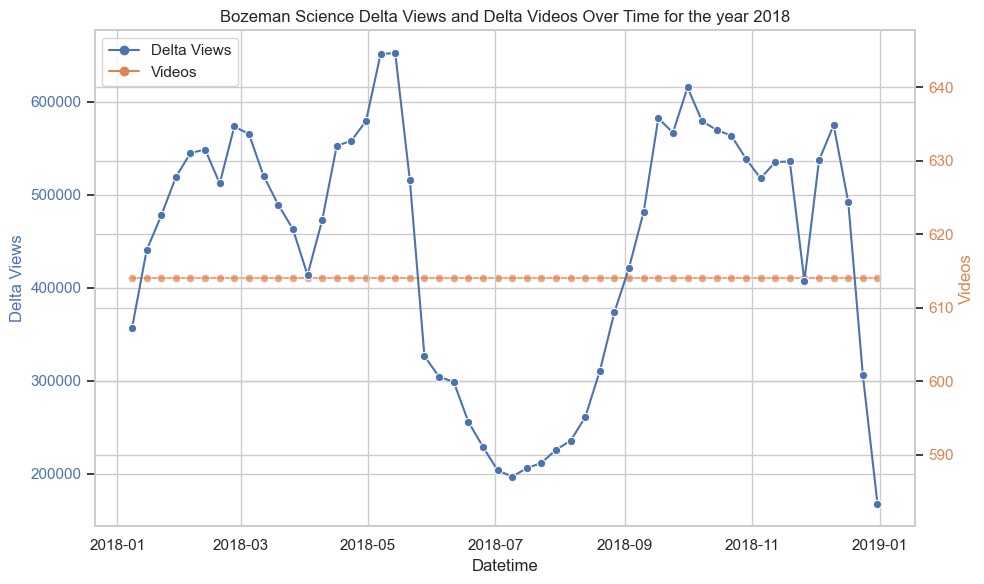

In [217]:
plot_stats_channel('Bozeman Science', 2018)